## Gaussian Mixture Model

De las mezclas de funciones de probabilidad, la mezcla de Gaussianas es una de las más conocidas,

$$
p(\mathbf{x})=\sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right),
$$

donde $K$ es el número de componentes de la mezcla, y los parámetros $\pi_k$ son probabilidades que satisfacen

$$
0 \leq \pi_k \leq 1, \quad \sum_{k=1}^K \pi_k=1
$$


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

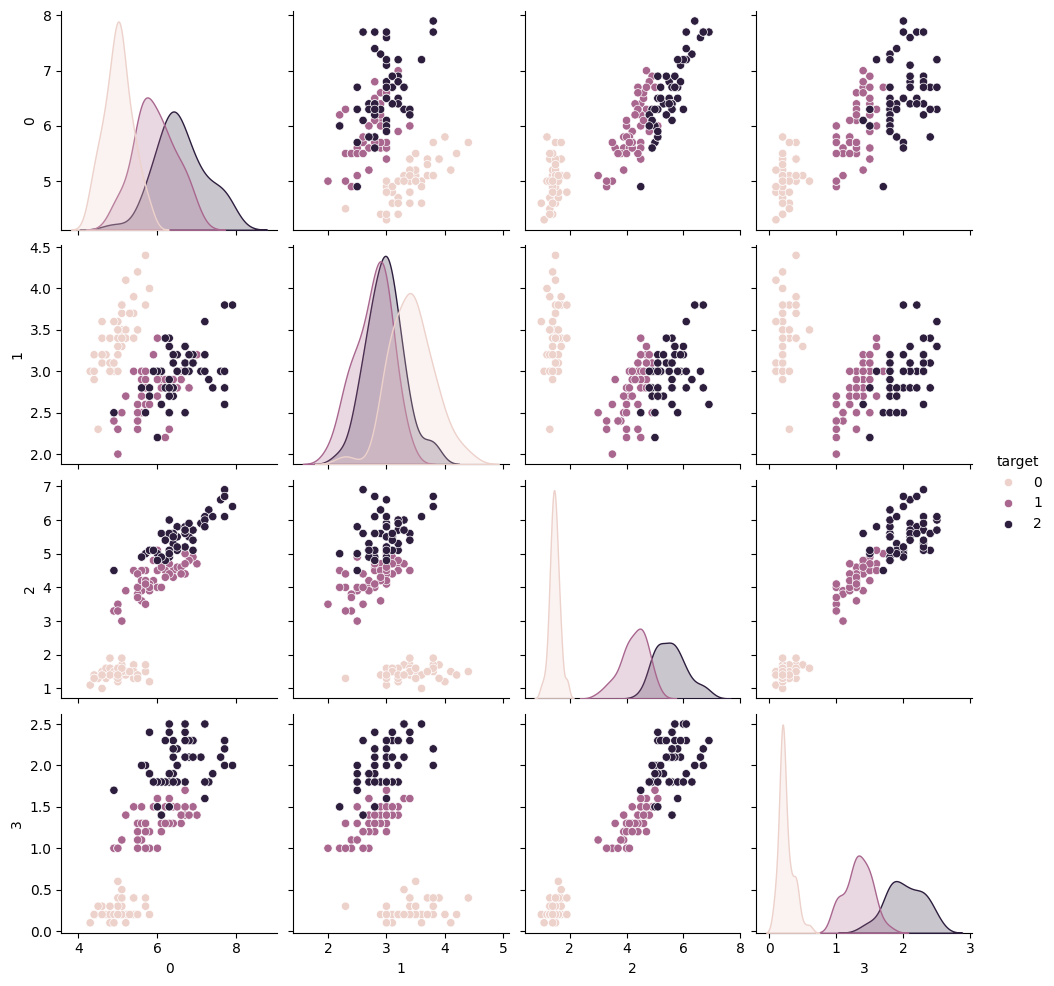

In [50]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

dataF = pd.DataFrame(X)
dataF['target'] = np.expand_dims(y,axis = 1)

dataF.describe()

sns.pairplot(dataF, hue='target')


In [51]:
dataF.describe()

,0,1,2,3,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Otra cantidad que juega un papel importante es la probabilidad condicional de $\mathbf{z}$ dado $\mathbf{x}$.

Esta probabilidad está dada como

$$
\begin{aligned}
\gamma\left(z_k\right) \equiv p\left(z_k=1 \mid \mathbf{x}\right) & =\frac{p\left(z_k=1\right) p\left(\mathbf{x} \mid z_k=1\right)}{\sum_{j=1}^K p\left(z_j=1\right) p\left(\mathbf{x} \mid z_j=1\right)} \\
& =\frac{\pi_k \mathcal{N}\left(\mathbf{x} \mid \boldsymbol{\mu}_k, \Sigma_k\right)}{\sum_{j=1}^K \pi_j \mathcal{N}\left(\mathbf{x} \mid \mu_j, \Sigma_j\right)}
\end{aligned}
$$


Función de verosimilitud logarítmica
- Se parte de un conjunto de datos $\left\{\mathbf{x}_1, \mathbf{x}_2, \ldots, \mathbf{x}_N\right\}$ que se desean modelar con una mezcla de Gaussianas.
- Este conjunto de datos se representan con una matriz $\mathbf{X}$ de dimensiones $N \times D$ y filas $\mathbf{x}_n^{\top}$.
- Similarmente, las variables latentes correspondientes se denotan por una matriz $\mathbf{Z}$ con filas $\mathbf{z}_n^{\top}$ y de dimensiones $N \times K$.
- La función de verosimilitud logarítmica está dada por

$$
\ln p(\mathbf{X} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})=\sum_{n=1}^N \ln \left\{\sum_{k=1}^K \pi_k \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)\right\}
$$

] Encontrar los parámetros $\theta^{\text {old }}=\left\{\left\{\pi_k\right\}_{k=1}^K,\left\{\boldsymbol{\mu}_k\right\}_{k=1}^K,\left\{\boldsymbol{\Sigma}_k\right\}_{k=1}^K\right\}$, que maximicen la función de verosimilitud de los datos incompletos.

### Algoritmo EM

1. Se escoge un valor inicial para $\theta^{\text {new }}$.
2. Paso E. Se calcula $\gamma\left(z_{n k}\right)$, para $n=1, \ldots, N$ y $k=1, \ldots, K$.
3.  Paso M. Se usan las fórmulas de actualización para $\pi_k^{\text {new }}, \boldsymbol{\mu}_k^{\text {new }}$ y $\Sigma_k^{\text {new }}$, para $k=1, \ldots, K$.
4. Se verifica la convergencia de la función de verosimilitud o de los parámetros. Si no se satisface el criterio de convergencia, luego $\theta^{\text {old }} \leftarrow \theta^{\text {new }}$ y se repite desde el paso 2.

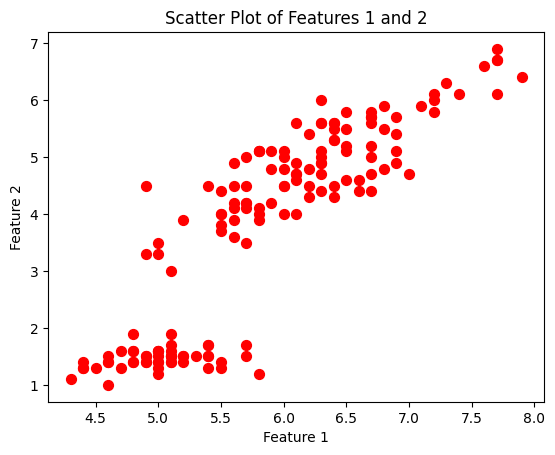

In [13]:
# Seleccionemos como prueba los features 0, 2
X_2d = X[:,[0,2]]

plt.scatter(X_2d[:,0], X_2d[:,1], marker='o', color='r', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features 1 and 2')
plt.show()

In [8]:
# Inicializar aleatoriamente los theta_old
# Fija el mnúmero de clusters K = 3
np.random.seed(42)
pi1 = 0.35
pi2 = 0.05
pi3 = 0.6
mu_1 = np.random.randn(2,) + np.reshape([3,1],(2,))
mu_2 = np.random.randn(2,) + np.reshape([7,2],(2,))
mu_3 = np.random.randn(2,) + np.reshape([3,8],(2,))

In [9]:
aux = np.random.randn(2,2)
print(aux)
print(aux.T)
print(aux.T@aux)

[[ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]
[[ 1.57921282 -0.46947439]
 [ 0.76743473  0.54256004]]
[[2.71431932 0.95722472]
 [0.95722472 0.88332746]]


In [10]:
aux = np.random.randn(2,2)
Sigma_1 =0.5*aux.T@aux
aux2 = np.random.randn(2,2)
Sigma_2 = 0.5*aux2.T@aux2
aux3 = np.random.randn(2,2)
Sigma_3 = 0.5*aux3.T@aux3
print(Sigma_1, np.linalg.det(Sigma_1))
print(Sigma_2, np.linalg.det(Sigma_2))
print(Sigma_3, np.linalg.det(Sigma_3))


[[ 0.13665085 -0.12355711]
 [-0.12355711  1.93877275]] 0.24966858280658477
[[2.0005842  0.32581015]
 [0.32581015 0.20745933]] 0.3088875935403325
[[1.48631702 0.4757485 ]
 [0.4757485  1.02278834]] 1.2938510792552076


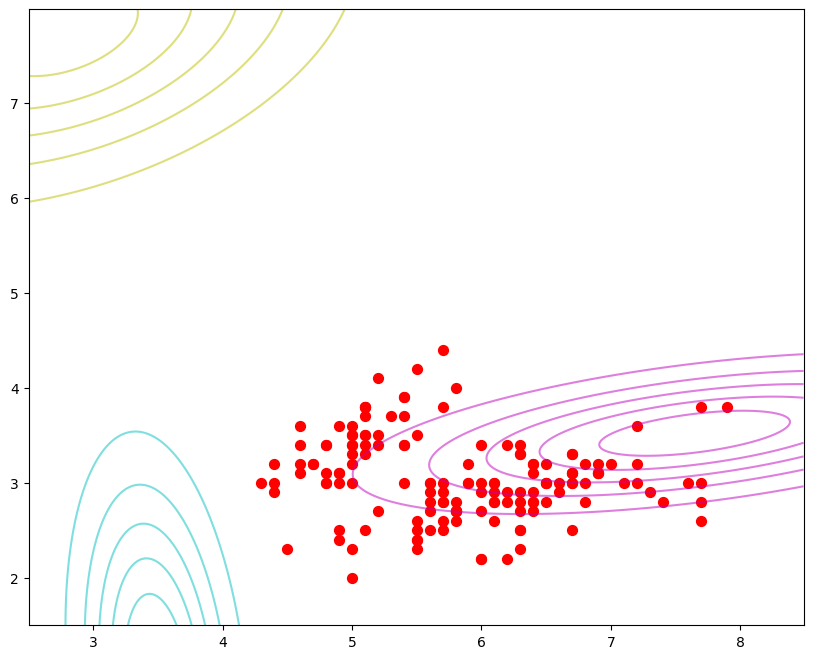

In [11]:
# Graficamos el ajuste inicial
from scipy.stats import multivariate_normal

# Create a grid of points
x, y = np.mgrid[2.5:8.5:.01, 1.5:8:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(mu_1, Sigma_1)
rv2 = multivariate_normal(mu_2, Sigma_2)
rv3 = multivariate_normal(mu_3, Sigma_3)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 8))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)

plt.scatter(X[:,0], X[:,1], marker='o', color='r', s=50)

$$\begin{aligned}
&\text { Las probabilidades } \gamma\left(z_{n, k}\right) \text { están dadas como }\\
&\begin{aligned}
\gamma\left(z_{n, k}\right) \equiv p\left(z_{n, k}=1 \mid \mathbf{x}_n\right) & =\frac{p\left(z_{n, k}=1\right) p\left(\mathbf{x}_n \mid z_{n, k}=1\right)}{\sum_{j=1}^K p\left(z_{n, j}=1\right) p\left(\mathbf{x}_n \mid z_{n, j}=1\right)} \\
& =\frac{\pi_k \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)}{\sum_{j=1}^K \pi_j \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_j, \boldsymbol{\Sigma}_j\right)}
\end{aligned}
\end{aligned}$$

In [14]:
gama_Znk = np.zeros((X_2d.shape[0],3)) # Matriz de responsabilidades o Posterior P(zn|xn)

for n in range(X.shape[0]):
  x_n = X_2d[n,:]
  for k in range(3):
    if k == 0:
      gama_Znk[n,k] = pi1 * multivariate_normal.pdf(x_n, mu_1, Sigma_1)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 1:
      gama_Znk[n,k] = pi2 * multivariate_normal.pdf(x_n, mu_2, Sigma_2)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))
    if k == 2:
      gama_Znk[n,k] = pi3 * multivariate_normal.pdf(x_n, mu_3, Sigma_3)/(pi1 * rv1.pdf(x_n) + pi2 * rv2.pdf(x_n) + pi3 * rv3.pdf(x_n))

print(gama_Znk)

[[9.33149640e-01 6.68503594e-02 9.64794238e-10]
 [9.92838798e-01 7.16120134e-03 2.14280832e-10]
 [9.99704543e-01 2.95456996e-04 2.43401578e-11]
 [9.98813491e-01 1.18650875e-03 8.36160096e-11]
 [9.78531547e-01 2.14684527e-02 4.46398837e-10]
 [7.70944400e-03 9.92290554e-01 2.38550019e-09]
 [9.99607873e-01 3.92127351e-04 3.47178324e-11]
 [9.33980343e-01 6.60196555e-02 1.06304753e-09]
 [9.99919722e-01 8.02777164e-05 1.45621230e-11]
 [9.77630244e-01 2.23697559e-02 5.21915002e-10]
 [7.09921830e-02 9.29007814e-01 3.35351390e-09]
 [9.77128460e-01 2.28715393e-02 6.39500696e-10]
 [9.97460829e-01 2.53917127e-03 1.09206462e-10]
 [9.99998828e-01 1.17180293e-06 7.79402916e-13]
 [7.63083424e-03 9.92369163e-01 2.34777887e-09]
 [7.22421586e-04 9.99277577e-01 1.16063989e-09]
 [4.87915233e-01 5.12084764e-01 3.43494123e-09]
 [9.33149640e-01 6.68503594e-02 9.64794238e-10]
 [6.69711466e-05 9.99933028e-01 7.42229586e-10]
 [8.10097924e-01 1.89902074e-01 2.10782139e-09]
 [7.70944400e-03 9.92290554e-01 2.385500

In [24]:
# Construirmos el modelo discriminante
N1, N2, N3 = 50,50,50
N = N1+N2+N3
piC1 = N1/N
piC2 = N2/N
piC3 = N3/N

X_d2 = X[:,[0,2]]

X_C1 = X_d2[:50,:2]
X_C2 = X_d2[50:100,:2]
X_C3 = X_d2[100:,:2]

muC1 = np.mean(X_C1, axis=0)
muC2 = np.mean(X_C2, axis=0)
muC3 = np.mean(X_C3, axis=0)

M1 = np.tile(muC1, (N1,1))
M2 = np.tile(muC2, (N2,1))
M3 = np.tile(muC3, (N3,1))

S1 = (1./N1) * (X_C1 - M1).T.dot(X_C1 - M1)
S2 = (1./N2) * (X_C2 - M2).T.dot(X_C2 - M2)
S3 = (1./N3) * (X_C3 - M3).T.dot(X_C3 - M3)

Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

Para el caso $K>2$ se tiene

$$
a_k(\mathbf{x})=\mathbf{w}_k^{\top} \mathbf{x}+w_{k 0}
$$

donde se ha definido $\mathbf{w}_k=\boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_k, w_{k 0}=-\frac{1}{2} \boldsymbol{\mu}_k^{\top} \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_k+\ln p\left(\mathcal{C}_k\right)$.

In [25]:
w_C1 = np.linalg.inv(Sigma).dot(muC1)
w_C2 = np.linalg.inv(Sigma).dot(muC2)
w_C3 = np.linalg.inv(Sigma).dot(muC3)

w_10 = -0.5 * (muC1.T.dot(np.linalg.inv(Sigma)).dot(muC1)) + np.log(piC1)
w_20 = -0.5 * (muC2.T.dot(np.linalg.inv(Sigma)).dot(muC2))+ np.log(piC2)
w_30 = -0.5 * (muC3.T.dot(np.linalg.inv(Sigma)).dot(muC3))+ np.log(piC3)

A1 = w_C1.T.dot(X_d2.T) + w_10
A2 = w_C2.T.dot(X_d2.T) + w_20
A3 = w_C3.T.dot(X_d2.T) + w_30

A = np.vstack((A1,A2,A3)).T

\begin{aligned}
&\text { Para el caso } K>2 \text { se tiene }\\
&p\left(\mathcal{C}_k \mid \mathbf{x}\right)=\frac{p\left(\mathbf{x} \mid \mathcal{C}_k\right) p\left(\mathcal{C}_k\right)}{\sum_j p\left(\mathbf{x} \mid \mathcal{C}_j\right) p\left(\mathcal{C}_j\right)}=\frac{\exp \left(a_k\right)}{\sum_j \exp \left(a_j\right)}
\end{aligned}

In [26]:
postCk = np.exp(A) / np.sum(np.exp(A), axis=1, keepdims=True)

In [27]:
print(postCk)

[[1.00000000e+00 1.88219094e-16 2.40083464e-31]
 [1.00000000e+00 3.35016840e-15 1.08223140e-29]
 [1.00000000e+00 3.47030812e-15 9.15119434e-30]
 [1.00000000e+00 4.32287461e-12 1.74605207e-25]
 [1.00000000e+00 7.94081647e-16 1.61191149e-30]
 [1.00000000e+00 1.27163925e-14 1.20178321e-28]
 [1.00000000e+00 2.51577083e-13 3.27534427e-27]
 [1.00000000e+00 1.36447857e-14 8.59293301e-29]
 [1.00000000e+00 4.47789635e-12 1.47643672e-25]
 [1.00000000e+00 5.75662845e-14 5.76926340e-28]
 [1.00000000e+00 4.30686046e-17 4.22888291e-32]
 [1.00000000e+00 4.17321962e-12 2.06490248e-25]
 [1.00000000e+00 1.41340987e-14 7.26606156e-29]
 [1.00000000e+00 3.72366697e-15 6.54324334e-30]
 [1.00000000e+00 2.67947802e-23 1.37375469e-40]
 [1.00000000e+00 5.73530294e-19 1.39729735e-34]
 [1.00000000e+00 1.45867211e-19 1.48807626e-35]
 [1.00000000e+00 1.88219094e-16 2.40083464e-31]
 [1.00000000e+00 1.69339972e-16 3.97090328e-31]
 [1.00000000e+00 3.23418784e-15 1.27986006e-29]
 [1.00000000e+00 1.27163925e-14 1.201783

In [28]:
print(Sigma)

[[0.259708 0.164164]
 [0.164164 0.181484]]


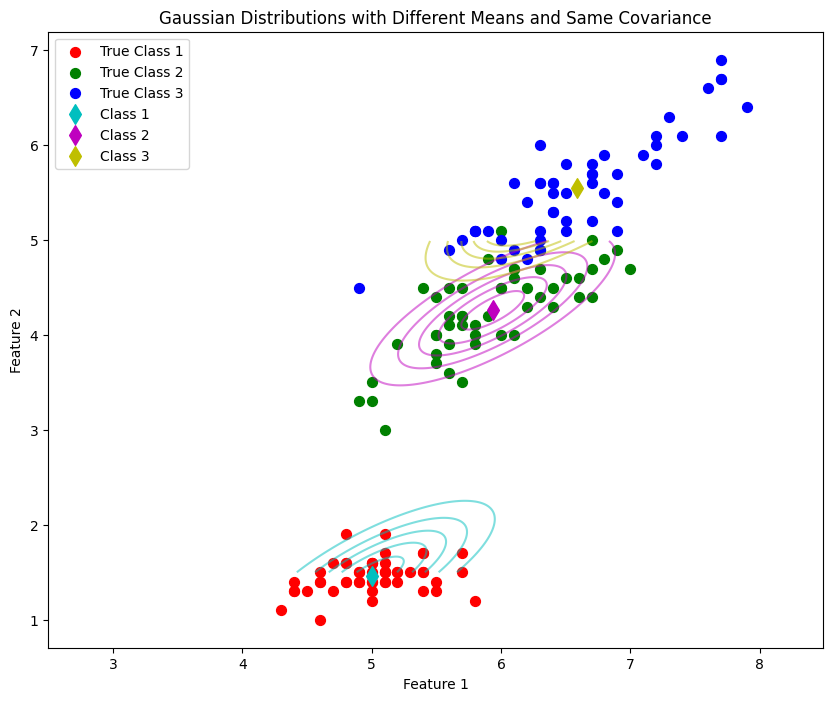

In [29]:
from scipy.stats import multivariate_normal

# Create a grid of points
x, y = np.mgrid[2.5:8.5:.01, 1.5:5:.01]
pos = np.dstack((x, y))

# Calculate the Gaussian probability density function for each class
rv1 = multivariate_normal(muC1, Sigma)
rv2 = multivariate_normal(muC2, Sigma)
rv3 = multivariate_normal(muC3, Sigma)
z1 = rv1.pdf(pos)
z2 = rv2.pdf(pos)
z3 = rv3.pdf(pos)

# Plot the Gaussian distributions
plt.figure(figsize=(10, 8))
plt.contour(x, y, z1, levels=5, colors='c', alpha=0.5)
plt.contour(x, y, z2, levels=5, colors='m', alpha=0.5)
plt.contour(x, y, z3, levels=5, colors='y', alpha=0.5)

# Plot the means of each class
plt.scatter(X_C1[:,0], X_C1[:,1], marker='o', color='r', s=50, label='True Class 1')
plt.scatter(X_C2[:,0], X_C2[:,1], marker='o', color='g', s=50, label='True Class 2')
plt.scatter(X_C3[:,0], X_C3[:,1], marker='o', color='b', s=50, label='True Class 3')

plt.scatter(muC1[0], muC1[1], marker='d', color='c', s=100, label='Class 1')
plt.scatter(muC2[0], muC2[1], marker='d', color='m', s=100, label='Class 2')
plt.scatter(muC3[0], muC3[1], marker='d', color='y', s=100, label='Class 3')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Distributions with Different Means and Same Covariance')
plt.legend()
plt.show()


# Estimación de Parámetros para un Modelo GMM



min	4.300000	2.000000	1.000000	0.100000	0.000000


max	7.900000	4.400000	6.900000	2.500000	2.000000

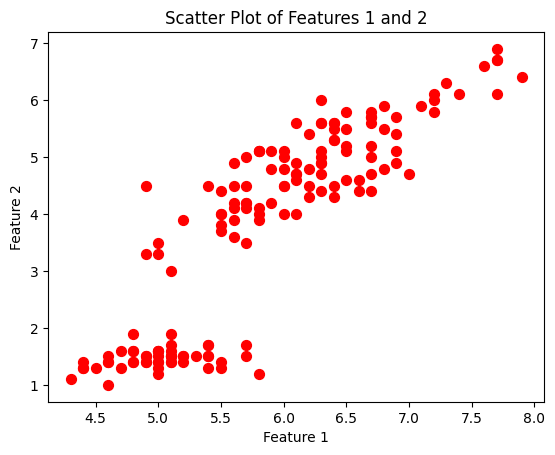

[[ 1.76442574 -0.58625711  0.61393183 -0.49916558]
 [-0.58625711  1.91133572  1.43599481  0.49767436]
 [ 0.61393183  1.43599481  2.56459776  0.86183443]
 [-0.49916558  0.49767436  0.86183443  2.2409127 ]] 3.2707747119243775
[[ 0.47495295 -0.04663764 -0.00625295 -0.63865491]
 [-0.04663764  2.53675587  0.94424369  0.1568095 ]
 [-0.00625295  0.94424369  1.40804184 -1.17268649]
 [-0.63865491  0.1568095  -1.17268649  2.52540574]] 0.33402140639046857
[[ 1.73330513  0.15196598 -0.0917413  -1.57219917]
 [ 0.15196598  2.04812322  0.14421115  0.09297178]
 [-0.0917413   0.14421115  0.74495699  0.33578065]
 [-1.57219917  0.09297178  0.33578065  1.54238336]] 0.03638855950441442


In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris
# Inicializar aleatoriamente los theta_old
# Fija el mnúmero de clusters K = 3
np.random.seed(42)
X, y = load_iris(return_X_y=True)
# Seleccionemos como prueba los features 0, 2
# X_2d = X[:,[0,2]]  # Este toma las dimensiones 1 y 3
X_2d = X[:,[0,2,1,3]]

plt.scatter(X_2d[:,0], X_2d[:,1], marker='o', color='r', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Features 1 and 2')
plt.show()
pi1 = 0.35
pi2 = 0.05
pi3 = 0.6
mu_1 = np.random.randn(4,)  + np.reshape([4,1,1,-1],(4,))
mu_2 = np.random.randn(4,)  + np.reshape([6,4,2.5,0],(4,))
mu_3 = np.random.randn(4,)  + np.reshape([8,7.,5.5,2.5],(4,))

aux = np.random.randn(4,4)
Sigma_1 =0.5*aux.T@aux
aux2 = np.random.randn(4,4)
Sigma_2 = 0.5*aux2.T@aux2
aux3 = np.random.randn(4,4)
Sigma_3 = 0.5*aux3.T@aux3
print(Sigma_1, np.linalg.det(Sigma_1))
print(Sigma_2, np.linalg.det(Sigma_2))
print(Sigma_3, np.linalg.det(Sigma_3))


In [53]:
def PasoE(X_2d,mu_1,mu_2,mu_3,Sigma_1,Sigma_2,Sigma_3,pi1,pi2,pi3):
  gama_Znk = np.zeros((X_2d.shape[0],3)) # Matriz de responsabilidades o Posterior P(zn|xn)
  Z = np.zeros((X_2d.shape[0],3))
  for n in range(X_2d.shape[0]):
    x_n = X_2d[n,:]
    p_xn_Gauss1 = multivariate_normal.pdf(x_n, mu_1, Sigma_1)
    p_xn_Gauss2 = multivariate_normal.pdf(x_n, mu_2, Sigma_2)
    p_xn_Gauss3 = multivariate_normal.pdf(x_n, mu_3, Sigma_3)
    for k in range(3):
      if k == 0:
        gama_Znk[n,k] = pi1 * p_xn_Gauss1/(pi1 * p_xn_Gauss1 + pi2 * p_xn_Gauss2 + pi3 * p_xn_Gauss3)
      if k == 1:
        gama_Znk[n,k] = pi2 * p_xn_Gauss2/(pi1 * p_xn_Gauss1 + pi2 * p_xn_Gauss2 + pi3 * p_xn_Gauss3)
      if k == 2:
        gama_Znk[n,k] = pi3 * p_xn_Gauss3/(pi1 * p_xn_Gauss1 + pi2 * p_xn_Gauss2 + pi3 * p_xn_Gauss3)
  pos = np.argmax(gama_Znk, axis=1)
  Z[np.arange(X_2d.shape[0]),pos] = 1.
  return gama_Znk, Z



In [54]:
probZdadoX, Z = PasoE(X_2d,mu_1,mu_2,mu_3,Sigma_1,Sigma_2,Sigma_3,pi1,pi2,pi3)
print(probZdadoX[:-10])
print(Z[:-10])
print(np.argmax(probZdadoX, axis=1))

[[9.57222339e-001 4.27776613e-002 2.32478227e-139]
 [9.99818307e-001 1.81693339e-004 7.78603840e-142]
 [9.99767426e-001 2.32574014e-004 5.09161378e-164]
 [9.99988066e-001 1.19335981e-005 1.25019033e-171]
 [9.54274660e-001 4.57253402e-002 1.46666045e-150]
 [6.59612931e-001 3.40387069e-001 1.08350115e-111]
 [9.99235261e-001 7.64738745e-004 5.75131310e-170]
 [9.90380324e-001 9.61967605e-003 1.43522527e-145]
 [9.99999894e-001 1.05660962e-007 5.30675019e-183]
 [9.99816723e-001 1.83277095e-004 8.08399829e-155]
 [7.55946516e-001 2.44053484e-001 8.64642218e-122]
 [9.98561183e-001 1.43881682e-003 1.21801700e-163]
 [9.99969431e-001 3.05693950e-005 8.59477759e-160]
 [9.99999792e-001 2.07528082e-007 7.14255838e-204]
 [7.50384787e-001 2.49615213e-001 3.16818762e-098]
 [8.65641461e-001 1.34358539e-001 4.72285365e-101]
 [6.53379238e-001 3.46620762e-001 4.46036121e-109]
 [9.43982289e-001 5.60177112e-002 1.94105764e-130]
 [6.44329571e-001 3.55670429e-001 7.11868291e-096]
 [8.16332791e-001 1.83667209e-0

# Paso M

Mezcla de Gaussianas: Aplicación del paso M (III)
- La maximización de $\mathcal{Q}\left(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text {old }}\right)$ con respecto a $\pi_k$ conduce a

$$
\pi_k^{\mathrm{new}}=\frac{1}{N} \sum_{n=1}^N \gamma\left(z_{n k}\right)=\frac{N_k}{N}
$$

donde $N_k=\sum_{n=1}^N \gamma\left(z_{n k}\right)$.
- La maximización de $\mathcal{Q}\left(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text {old }}\right)$ con respecto a $\boldsymbol{\mu}_k$ conduce a

$$
\boldsymbol{\mu}_k^{\mathrm{new}}=\frac{1}{N_k} \sum_{n=1}^N \gamma\left(z_{n k}\right) \mathbf{x}_n
$$

- La maximización de $\mathcal{Q}\left(\boldsymbol{\theta}, \boldsymbol{\theta}^{\text {old }}\right)$ con respecto a $\boldsymbol{\Sigma}_k$ conduce a

$$
\boldsymbol{\Sigma}_k^{\text {new }}=\frac{1}{N_k} \sum_{n=1}^N \gamma\left(z_{n k}\right)\left(\mathbf{x}_n-\boldsymbol{\mu}_k^{\text {new }}\right)\left(\mathbf{x}_n-\boldsymbol{\mu}_k^{\text {new }}\right)^{\top}
$$


In [55]:
def PasoM(X_2d,Z):
  N1 = np.sum(Z[:,0])
  #print(N1)
  N2 = np.sum(Z[:,1])
  N3 = np.sum(Z[:,2])
  # Actualizamos los priors pi_k
  pi1_new = N1/float(N1+N2+N3)
  #print(pi1_new)
  pi2_new = N2/float(N1+N2+N3)
  pi3_new = N3/float(N1+N2+N3)
  # Actualizamos la media mu_k
  posk1 = np.where(Z[:,0] == 1.)[0]
  mu_1_new = np.mean(X_2d[posk1,:], axis=0)
  posk2 = np.where(Z[:,1] == 1.)[0]
  mu_2_new = np.mean(X_2d[posk2,:], axis=0)
  posk3 = np.where(Z[:,2] == 1.)[0]
  mu_3_new = np.mean(X_2d[posk3,:], axis=0)
  # Actualizamos las covarianzas Sigma_k
  M1 = np.tile(mu_1_new, (int(N1),1))
  M2 = np.tile(mu_2_new, (int(N2),1))
  M3 = np.tile(mu_3_new, (int(N3),1))

  S1 = (1./N1) * (X_2d[posk1,:] - M1).T.dot(X_2d[posk1,:] - M1)
  S2 = (1./N2) * (X_2d[posk2,:] - M2).T.dot(X_2d[posk2,:] - M2)
  S3 = (1./N3) * (X_2d[posk3,:] - M3).T.dot(X_2d[posk3,:] - M3)
  #print(pi1_new)
  return pi1_new, pi2_new, pi3_new, mu_1_new, mu_2_new, mu_3_new, S1, S2, S3

In [56]:
pi1_new, pi2_new, pi3_new, mu_1_new, mu_2_new, mu_3_new, Sigma_1, Sigma_2, Sigma_3 = PasoM(X_2d,Z)

Verosimilitud logarítmica

\begin{aligned}
&\ln p(\mathbf{X}, \mathbf{Z} \mid \boldsymbol{\pi}, \boldsymbol{\mu}, \boldsymbol{\Sigma})=\sum_{n=1}^N \sum_{k=1}^K z_{n k}\left\{\ln \pi_k+\ln \mathcal{N}\left(\mathbf{x}_n \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k\right)\right\}
\end{aligned}

In [57]:
def logLikelihood(X_2d,pi1,pi2,pi3,mu_1,mu_2,mu_3,Sigma_1,Sigma_2,Sigma_3):
  LL = 0
  for n in range(X_2d.shape[0]):
    x_n = X_2d[n,:]
    for k in range(3):
      if k == 0:
        LL += np.log(pi1) + multivariate_normal.logpdf(x_n, mu_1, Sigma_1)
      if k == 1:
        LL += np.log(pi2) + multivariate_normal.logpdf(x_n, mu_2, Sigma_2)
      if k == 2:
        LL += np.log(pi3) + multivariate_normal.logpdf(x_n, mu_3, Sigma_3)
  return LL


## Modelo de Mezclas de Gaussianas

In [58]:
max_iters = 20
ll =[]
for i in range(max_iters):
  probZdadoX, Z = PasoE(X_2d,mu_1,mu_2,mu_3,Sigma_1,Sigma_2,Sigma_3,pi1,pi2,pi3)
  pi1, pi2, pi3, mu_1, mu_2, mu_3, Sigma_1, Sigma_2, Sigma_3 = PasoM(X_2d,Z)
  ll.append(logLikelihood(X_2d,pi1,pi2,pi3,mu_1,mu_2,mu_3,Sigma_1,Sigma_2,Sigma_3))

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-55-3213eec0c453>:24: RuntimeWarning: divide by zero encountered in scalar divide
  S3 = (1./N3) * (X_2d[posk3,:] - M3).T.dot(X_2d[posk3,:] - M3)
<ipython-input-55-3213eec0c453>:24: RuntimeWarning: invalid value encountered in multiply
  S3 = (1./N3) * (X_2d[posk3,:] - M3).T.dot(X_2d[posk3,:] - M3)


LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

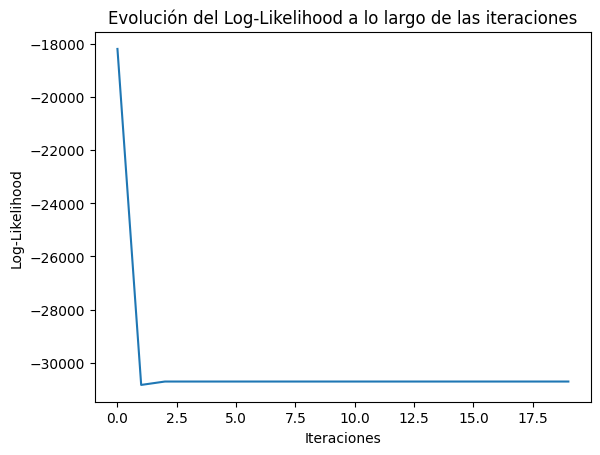

In [32]:
plt.plot(np.arange(20),ll)
plt.xlabel('Iteraciones')
plt.ylabel('Log-Likelihood')
plt.title('Evolución del Log-Likelihood a lo largo de las iteraciones')
plt.show()

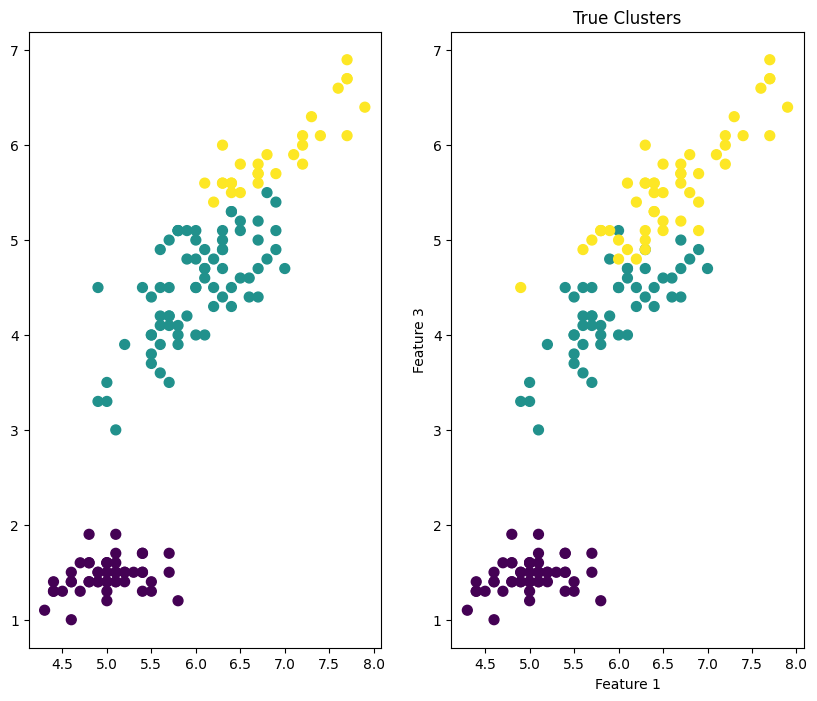

In [33]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))
ax[0].scatter(X_2d[:,0], X_2d[:,1], marker='o', c = np.argmax(Z,axis = 1), s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('Inferred Clusters with GMM')
ax[1].scatter(X_2d[:,0], X_2d[:,1], marker='o', c = y, s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 3')
plt.title('True Clusters')
plt.show()

In [34]:
from sklearn.metrics import rand_score
print(rand_score(y, np.argmax(Z,axis = 1)))


0.8464429530201343
